<a href="https://colab.research.google.com/github/Zlovredniy/MachineExperience1/blob/main/lab3/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd

df = pd.read_csv('ca_offenses_by_agency.csv')
df[:10]

,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,NaN,0.0,321.0,4,0.0,2,2,0.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,NaN,0.0,12.0,79,21.0,56,2,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,NaN,0.0,149.0,3,1.0,2,0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,NaN,1.0,1.0,26,8.0,18,0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,NaN,0.0,0.0,1,0.0,0,1,0.0
5,State Agencies,Department of Parks and Recreation,Calaveras County4,1.0,0.0,0.0,NaN,0.0,1.0,2,2.0,0,0,0.0
6,State Agencies,Department of Parks and Recreation,Capital,0.0,0.0,0.0,NaN,0.0,0.0,7,2.0,5,0,1.0
7,State Agencies,Department of Parks and Recreation,Channel Coast,0.0,0.0,0.0,NaN,0.0,0.0,16,3.0,13,0,0.0
8,State Agencies,Department of Parks and Recreation,Colorado,0.0,0.0,0.0,NaN,0.0,0.0,0,0.0,0,0,0.0
9,State Agencies,Department of Parks and Recreation,Four Rivers District,0.0,0.0,0.0,NaN,0.0,0.0,1,0.0,1,0,0.0


In [3]:
dl_df=df.drop('Rape (legacy definition)', axis = 1)

In [4]:
dl_df[:10]

,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,0.0,321.0,4,0.0,2,2,0.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,0.0,12.0,79,21.0,56,2,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,0.0,149.0,3,1.0,2,0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,1.0,1.0,26,8.0,18,0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,0.0,0.0,1,0.0,0,1,0.0
5,State Agencies,Department of Parks and Recreation,Calaveras County4,1.0,0.0,0.0,0.0,1.0,2,2.0,0,0,0.0
6,State Agencies,Department of Parks and Recreation,Capital,0.0,0.0,0.0,0.0,0.0,7,2.0,5,0,1.0
7,State Agencies,Department of Parks and Recreation,Channel Coast,0.0,0.0,0.0,0.0,0.0,16,3.0,13,0,0.0
8,State Agencies,Department of Parks and Recreation,Colorado,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
9,State Agencies,Department of Parks and Recreation,Four Rivers District,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0,0.0


In [5]:
#Удаление
del_df=dl_df
del_df.dropna()
del_df[:10]

,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,0.0,321.0,4,0.0,2,2,0.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,0.0,12.0,79,21.0,56,2,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,0.0,149.0,3,1.0,2,0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,1.0,1.0,26,8.0,18,0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,0.0,0.0,1,0.0,0,1,0.0
5,State Agencies,Department of Parks and Recreation,Calaveras County4,1.0,0.0,0.0,0.0,1.0,2,2.0,0,0,0.0
6,State Agencies,Department of Parks and Recreation,Capital,0.0,0.0,0.0,0.0,0.0,7,2.0,5,0,1.0
7,State Agencies,Department of Parks and Recreation,Channel Coast,0.0,0.0,0.0,0.0,0.0,16,3.0,13,0,0.0
8,State Agencies,Department of Parks and Recreation,Colorado,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
9,State Agencies,Department of Parks and Recreation,Four Rivers District,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0,0.0


In [6]:
#Заполнение при помощи медианы
fil_med_df = del_df.fillna(del_df.median().astype(int))
fil_med_df['Agency'] = del_df.fillna(del_df.mode())['Agency']
fil_med_df[:10]

<ipython-input-6-195969b8aff1>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fil_med_df = del_df.fillna(del_df.median().astype(int))


,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,0.0,321.0,4,0.0,2,2,0.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,0.0,12.0,79,21.0,56,2,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,0.0,149.0,3,1.0,2,0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,1.0,1.0,26,8.0,18,0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,0.0,0.0,1,0.0,0,1,0.0
5,State Agencies,Department of Parks and Recreation,Calaveras County4,1.0,0.0,0.0,0.0,1.0,2,2.0,0,0,0.0
6,State Agencies,Department of Parks and Recreation,Capital,0.0,0.0,0.0,0.0,0.0,7,2.0,5,0,1.0
7,State Agencies,Department of Parks and Recreation,Channel Coast,0.0,0.0,0.0,0.0,0.0,16,3.0,13,0,0.0
8,State Agencies,Department of Parks and Recreation,Colorado,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
9,State Agencies,Department of Parks and Recreation,Four Rivers District,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0,0.0


In [7]:
#Заполнение при помощи среднего
fil_mean_df = del_df.fillna(del_df.mean())
fil_mean_df[:10]

<ipython-input-7-c5cec7830a89>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fil_mean_df = del_df.fillna(del_df.mean())


,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,0.0,321.0,4,0.0,2,2,0.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,0.0,12.0,79,21.0,56,2,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,0.0,149.0,3,1.0,2,0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,1.0,1.0,26,8.0,18,0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,0.0,0.0,1,0.0,0,1,0.0
5,State Agencies,Department of Parks and Recreation,Calaveras County4,1.0,0.0,0.0,0.0,1.0,2,2.0,0,0,0.0
6,State Agencies,Department of Parks and Recreation,Capital,0.0,0.0,0.0,0.0,0.0,7,2.0,5,0,1.0
7,State Agencies,Department of Parks and Recreation,Channel Coast,0.0,0.0,0.0,0.0,0.0,16,3.0,13,0,0.0
8,State Agencies,Department of Parks and Recreation,Colorado,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
9,State Agencies,Department of Parks and Recreation,Four Rivers District,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0,0.0


In [8]:
#Заполнение при помощи моды
fil_mode_df = del_df.fillna(del_df['Property crime'].mode()[0])
fil_mode_df[:10]

,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,0,321.0,0.0,0.0,0.0,321.0,4,0.0,2,2,0.0
1,State Agencies,California State Fair4,0,12.0,0.0,0.0,0.0,12.0,79,21.0,56,2,1.0
2,State Agencies,Coalinga State Hospital,0,149.0,0.0,0.0,0.0,149.0,3,1.0,2,0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,1.0,1.0,26,8.0,18,0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,0.0,0.0,1,0.0,0,1,0.0
5,State Agencies,Department of Parks and Recreation,Calaveras County4,1.0,0.0,0.0,0.0,1.0,2,2.0,0,0,0.0
6,State Agencies,Department of Parks and Recreation,Capital,0.0,0.0,0.0,0.0,0.0,7,2.0,5,0,1.0
7,State Agencies,Department of Parks and Recreation,Channel Coast,0.0,0.0,0.0,0.0,0.0,16,3.0,13,0,0.0
8,State Agencies,Department of Parks and Recreation,Colorado,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
9,State Agencies,Department of Parks and Recreation,Four Rivers District,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0,0.0


In [9]:
#Заполнение при помощи интерполяции
inter_df = del_df.interpolate()
inter_df[:10]

,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,0.0,321.0,4,0.0,2,2,0.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,0.0,12.0,79,21.0,56,2,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,0.0,149.0,3,1.0,2,0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,1.0,1.0,26,8.0,18,0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,0.0,0.0,1,0.0,0,1,0.0
5,State Agencies,Department of Parks and Recreation,Calaveras County4,1.0,0.0,0.0,0.0,1.0,2,2.0,0,0,0.0
6,State Agencies,Department of Parks and Recreation,Capital,0.0,0.0,0.0,0.0,0.0,7,2.0,5,0,1.0
7,State Agencies,Department of Parks and Recreation,Channel Coast,0.0,0.0,0.0,0.0,0.0,16,3.0,13,0,0.0
8,State Agencies,Department of Parks and Recreation,Colorado,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
9,State Agencies,Department of Parks and Recreation,Four Rivers District,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0,0.0


**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


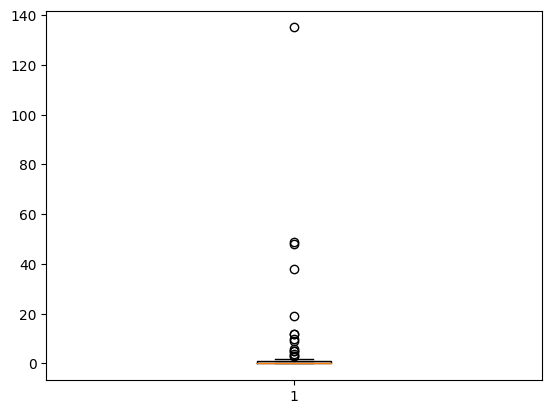

In [12]:
import matplotlib.pyplot as plt
df2 = fil_med_df.dropna()
plt.boxplot(df2["Violent crime"])
plt.show()

In [18]:
fil_med_df['Violent crime'].describe()

count    233.000000
mean      11.587983
std       69.358963
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max      803.000000
Name: Violent crime, dtype: float64

In [19]:
#Методом среднего
mean = df2["Violent crime"].mean()
std_deviation = df2["Violent crime"].std()
threshold = 3 * std_deviation

# Идентифицируем выбросы
outliers = [x for x in df2["Violent crime"] if abs(x - mean) > threshold]

# Выводим результаты
print("Среднее значение данных:", mean)
print("Стандартное отклонение данных:", std_deviation)
print("Потенциальные выбросы:", outliers)

Среднее значение данных: 2.7482517482517483
Стандартное отклонение данных: 13.080179894673527
Потенциальные выбросы: [48.0, 135.0, 49.0]


In [16]:
#При помощи межквартильного размаха
Q1 =  df2["Violent crime"].quantile(0.25)
Q3 = df2["Violent crime"].quantile(0.75)
IQR = Q3 - Q1
df_IQR = df2[(df2["Violent crime"] > (Q1-1.5*IQR )) & (df2["Violent crime"] < (Q3+1.5*IQR))]

df_IQR["Violent crime"].describe()

count    128.000000
mean       0.273438
std        0.571155
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: Violent crime, dtype: float64

**Объяснения**


##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [20]:
del_df.describe()

,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Burglary,Arson
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,167.000000
mean,15.976331,0.041420,0.201183,4.112426,11.621302,5.668639,0.281437
std,81.072642,0.295905,0.916644,31.098238,60.029644,20.991983,1.140103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
max,803.000000,3.000000,8.000000,387.000000,559.000000,178.000000,8.000000


In [21]:
#Проверка на дубли
duplicate_rows = del_df[del_df.duplicated()]
duplicate_rows

,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Удаление дублей
df_no_dup = del_df.drop_duplicates()
df_no_dup

,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,0.0,321.0,4,0.0,2,2,0.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,0.0,12.0,79,21.0,56,2,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,0.0,149.0,3,1.0,2,0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,1.0,1.0,26,8.0,18,0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,0.0,0.0,1,0.0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Other Agencies,Union Pacific Railroad,Tulare County4,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0,0.0
166,Other Agencies,Union Pacific Railroad,Ventura County4,2.0,0.0,0.0,0.0,2.0,0,0.0,0,0,0.0
167,Other Agencies,Union Pacific Railroad,Yolo County4,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0,0.0
168,Other Agencies,Union Pacific Railroad,Yuba County4,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#replace , na . и всё на флоат поменять

#MinMaxScaler
min_max_scaler = MinMaxScaler()
df_mima=del_df.copy()
num_features = del_df.select_dtypes(include=['float64']).columns
df_mima[num_features] = min_max_scaler.fit_transform(del_df[num_features])
df_mima["Property crime"].unique()

array(['4', '79', '3', '26', '1', '2', '7', '16', '0', '54', '13', '6',
       '91', '46', '67', '30', '33', '9', '14', '68', '5', '8', '223',
       '40', '323', '93', '11', '697', '60', '250', '212', '328', '56',
       '28', '216', '111', '198', '29', '797', '200', '99', '15', '151',
       '450', '389', '36', '63', '43', '147', '23', '103', '4,408', '22',
       '77', '101', '31', '746', '174', '171', '94', '483', '239', '55',
       '81', '359', '707', '37', '164', '57', '514', '166', '254', '45',
       '50', '195', '142', '44', '1,088', '569', '362', '1,648', '886',
       '207', '217', '107', '269', '148', '18', '283', '12', '20', '84',
       nan], dtype=object)

In [32]:
# StandardScaler
standard_scaler = StandardScaler()
df_std = del_df.copy()
df_std[num_features] = standard_scaler.fit_transform(del_df[num_features])
df_std["Property crime"].unique()

array(['4', '79', '3', '26', '1', '2', '7', '16', '0', '54', '13', '6',
       '91', '46', '67', '30', '33', '9', '14', '68', '5', '8', '223',
       '40', '323', '93', '11', '697', '60', '250', '212', '328', '56',
       '28', '216', '111', '198', '29', '797', '200', '99', '15', '151',
       '450', '389', '36', '63', '43', '147', '23', '103', '4,408', '22',
       '77', '101', '31', '746', '174', '171', '94', '483', '239', '55',
       '81', '359', '707', '37', '164', '57', '514', '166', '254', '45',
       '50', '195', '142', '44', '1,088', '569', '362', '1,648', '886',
       '207', '217', '107', '269', '148', '18', '283', '12', '20', '84',
       nan], dtype=object)

In [37]:
del_df = del_df.astype({'State/Tribal/Other': 'category',
                'Agency': 'category',
                'Unit/Office': 'category'})
del_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   State/Tribal/Other                    169 non-null    category
 1   Agency                                169 non-null    category
 2   Unit/Office                           143 non-null    category
 3   Violent crime                         169 non-null    float64 
 4   Murder and nonnegligent manslaughter  169 non-null    float64 
 5   Rape (revised definition)             169 non-null    float64 
 6   Robbery                               169 non-null    float64 
 7   Aggravated assault                    169 non-null    float64 
 8   Property crime                        169 non-null    object  
 9   Burglary                              169 non-null    float64 
 10  Larceny-theft                         169 non-null    object  
 11  Motor 

Масштабируйте категориальные признаки через OneHotEncoder

In [40]:
from sklearn.preprocessing import OneHotEncoder
#Создайте экземпляр OneHotEncoder.
cat_features = del_df.select_dtypes(include=['category']).columns

encoder = OneHotEncoder()
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(del_df[cat_features])

encoded_columns = encoder.get_feature_names_out(cat_features)
encoded_columns
encoded_features


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [42]:
df[encoded_columns] = encoded_features
df

,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,...,Unit/Office_Tehachapi District4,Unit/Office_Tehama County4,Unit/Office_Trinity County4,Unit/Office_Tulare County4,Unit/Office_Tuolumne County4,Unit/Office_Twin Cities,Unit/Office_Ventura County4,Unit/Office_Yolo County4,Unit/Office_Yuba County4,Unit/Office_nan
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,NaN,0.0,321.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,NaN,0.0,12.0,79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,NaN,0.0,149.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,NaN,1.0,1.0,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,NaN,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])